In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Remember the Gaussian autonormalizes itself. 
mu1, sigma1 = 1.25, np.sqrt(0.11)
mu2, sigma2 = 1.30, np.sqrt(0.50)
N_points = 4

data1 = np.random.normal(mu1, sigma1, N_points)
data2 = np.random.normal(mu2, sigma2, N_points)

[Text(0.5, 1.0, 'Data from Gaussian with $\\mu=1.30$, $\\sigma^2=0.50$'),
 Text(0.5, 0, 'Value')]

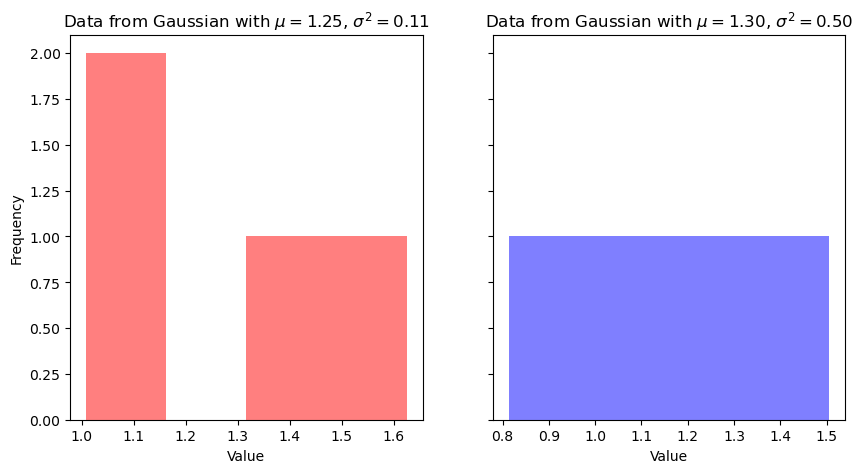

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

ax[0].hist(data1, bins=4, color='r', alpha=0.5)
ax[1].hist(data2, bins=4, color='b', alpha=0.5)

ax[0].set(title ='Data from Gaussian with $\mu=1.25$, $\sigma^2=0.11$', 
          xlabel='Value', 
          ylabel='Frequency')

ax[1].set(title ='Data from Gaussian with $\mu=1.30$, $\sigma^2=0.50$',
            xlabel='Value');

In [7]:
x = np.array([1.01, 1.30, 1.35, 1.44])

def likelihood_gaussian(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

likelihood1 = likelihood_gaussian(x, mu1, sigma1)
likelihood2 = likelihood_gaussian(x, mu2, sigma2)

print(f'Likelihood for data1: {np.prod(likelihood1):.3f}')
print(f'Likelihood for data2: {np.prod(likelihood2):.3f}')

# Remember, that even though the likelihood is higher for data 1, it is not neccesaryly a good fit. 
# It is just a better fit than data 2. 

Likelihood for data1: 1.292
Likelihood for data2: 0.091


# Exercise 1

In [54]:
np.random.seed(42)

gen_new_data = True

mu, sigma = 0.2, 0.1
N_points = 50 
N_iterations = 5

if gen_new_data:

    for i in range(N_iterations):
        data = np.random.normal(mu, sigma, N_points)

        #  Save the data as as csv file.
        np.savetxt(f'exercise1_data{i}.csv', data, delimiter=',')

In [55]:
# Load the data from the five csv files.
data = [np.loadtxt(f'exercise1_data{i}.csv', delimiter=',') for i in range(N_iterations)]

# Calculate the analytical likelihood
likelihood = [np.prod(likelihood_gaussian(data[i], mu, sigma)) for i in range(N_iterations)]

for i in range(N_iterations):
    print(f'Likelihood for data {i+1}: {likelihood[i]:.3e}')


Likelihood for data 1: 1.652e+20
Likelihood for data 2: 8.095e+21
Likelihood for data 3: 1.143e+19
Likelihood for data 4: 2.955e+21
Likelihood for data 5: 1.292e+17


In [64]:
# 2D Raster scan to find the maximum likelihood.

mu_min, mu_max = 0.1, 0.3
sigma_min, sigma_max = 0.05, 0.15

mu_values = np.linspace(mu_min, mu_max, 100)
sigma_values = np.linspace(sigma_min, sigma_max, 100)

likelihood = np.zeros((N_iterations, 100, 100))

for N in range(N_iterations):
    for i, mu in enumerate(mu_values):
        for j, sigma in enumerate(sigma_values):
            likelihood[N, i, j] = np.prod(likelihood_gaussian(data[N], mu, sigma))

In [65]:
# Find the maximum likelihood for each data set

max_likelihood = [np.max(likelihood[i]) for i in range(N_iterations)]
index = [np.unravel_index(np.argmax(likelihood[i], axis=None), likelihood.shape) for i in range(N_iterations)]
mu_max_likelihood = [mu_values[index[i][0]] for i in range(N_iterations)]
sigma_max_likelihood = [sigma_values[index[i][1]] for i in range(N_iterations)]

for i in range(N_iterations):
    print(f'Maximum likelihood for data {i+1}: {max_likelihood[i]:.3e} \
          at mu={mu_max_likelihood[i]:.3f} and sigma={sigma_max_likelihood[i]:.3f}')

Maximum likelihood for data 1: 7.893e+20 at mu=0.100 and sigma=0.088
Maximum likelihood for data 2: 2.103e+22 at mu=0.100 and sigma=0.101
Maximum likelihood for data 3: 1.187e+19 at mu=0.100 and sigma=0.098
Maximum likelihood for data 4: 7.029e+21 at mu=0.100 and sigma=0.105
Maximum likelihood for data 5: 3.141e+17 at mu=0.100 and sigma=0.108


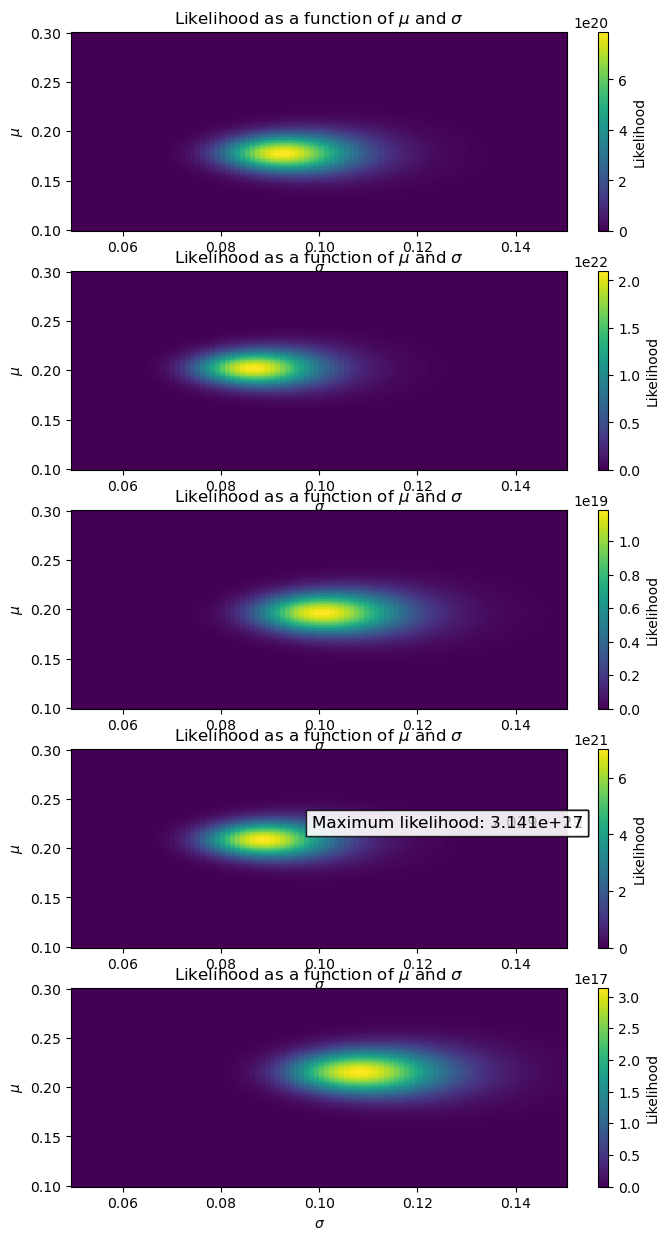

In [69]:
fig, axs = plt.subplots(nrows=N_iterations, figsize=(8, 15))

for i in range(N_iterations):
       c = axs[i].pcolormesh(sigma_values, mu_values, likelihood[i], cmap='viridis', shading='auto')
       fig.colorbar(c, label='Likelihood')

       axs[i].set(xlabel='$\sigma$',
              ylabel='$\mu$', 
              title='Likelihood as a function of $\mu$ and $\sigma$')

       # Insert text box with the maximum likelihood
       text = f'Maximum likelihood: {max_likelihood[i]:.3e}'
       axs[i].text(0.7, 0.94, text, fontsize=12, ha='center', va='center', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.7)); 

# Exercise 2 

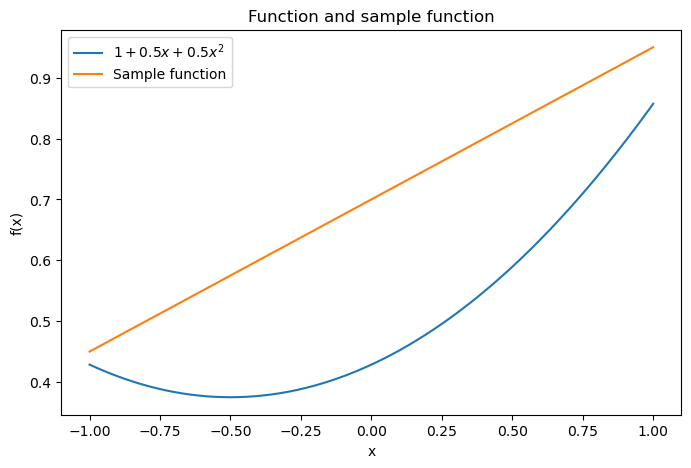

In [91]:
# Multi-parameter likelihood 

alpha, beta = 0.5, 0.5
N_points = 2000

def func(x, a, b):
    k = 1 / (2*b/3 + 2)
    return k * (1 + a*x + b*x**2) 

def sample_func(x, a, b):
    return a*x + b


x = np.linspace(-1, 1, N_points)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, func(x, alpha, beta), label=f'$1 + {a}x + {b}x^2$')
ax.plot(x, sample_func(x, 0.25, 0.7), label='Sample function')
ax.set(xlabel='x', ylabel='f(x)', title='Function and sample function')
ax.legend();


In [98]:
# Use Monte Carlo to sample from the function

N_samples = 2000
x_samples = np.random.uniform(-1, 1, N_samples*3)

accepted = []
rejected = []

i = 0
while len(accepted) < N_samples:
    y = np.random.uniform(0, sample_func(x_samples[i], 0.25, 0.7))
    if y < func(x_samples[i], alpha, beta):
        accepted.append((x_samples[i], y))
    else:
        rejected.append((x_samples[i], y))
    i += 1


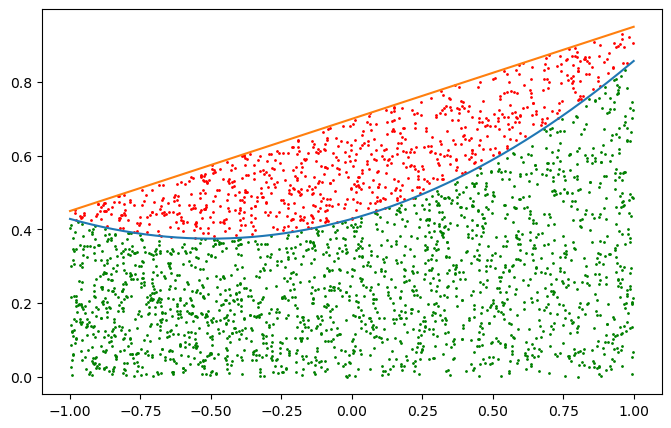

In [100]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, func(x, alpha, beta), label=f'$1 + {a}x + {b}x^2$')
ax.plot(x, sample_func(x, 0.25, 0.7), label='Sample function')

ax.scatter(*zip(*accepted), s=1, label='Accepted', color='g')
ax.scatter(*zip(*rejected), s=1, label='Rejected', color='r')

In [108]:
accepted[0][1]

0.3678470031257502

In [106]:
from scipy.optimize import minimize

def likelihood_poly(x, a, b): 
    return func(x, a, b)

true_likelihood = np.prod([likelihood_poly(accepted[i][0], alpha, beta) for i in range(N_samples)])

print(f'True likelihood: {true_likelihood:.3e}')





True likelihood: 0.000e+00
